In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("soil")
df.head()

,sno,district,Nitrogen,Phosphorus,potassium,OC,Level
0,1,chennai,0,0,0,0,0.0
1,2,Kancheepuram,2,5,2,2,2.8
2,3,Thiruvallur,2,3,3,2,2.5
3,4,Cuddalore,1,3,3,1,2.0
4,5,Villupuram,1,1,3,1,1.5


In [11]:
df.tail()

,sno,district,Nitrogen,Phosphorus,potassium,OC,Level
27,28,Sivaganga,2,3,3,2,2.5
28,29,Tirunelveli,2,5,4,1,3.0
29,30,Thoothukkudi,2,2,4,1,2.3
30,31,The Nilgiris,2,3,3,5,3.3
31,32,Kanniyakumari,2,3,1,1,1.8


In [12]:
df = df.iloc[:,[3,4]].values
df


array([[0, 0],
       [5, 2],
       [3, 3],
       [3, 3],
       [1, 3],
       [2, 3],
       [1, 1],
       [2, 3],
       [3, 4],
       [3, 3],
       [3, 3],
       [2, 3],
       [1, 4],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [3, 1],
       [3, 1],
       [5, 1],
       [3, 3],
       [5, 3],
       [3, 3],
       [1, 3],
       [3, 4],
       [3, 5],
       [2, 4],
       [3, 3],
       [5, 4],
       [2, 4],
       [3, 3],
       [3, 1]], dtype=int64)

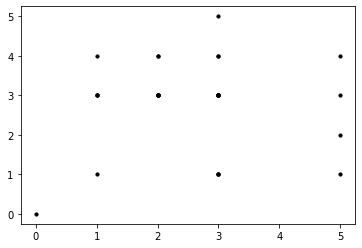

In [13]:
plt.scatter(df[:,0], df[:,1], s=10, c= "black")


In [16]:
from sklearn.cluster import KMeans

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


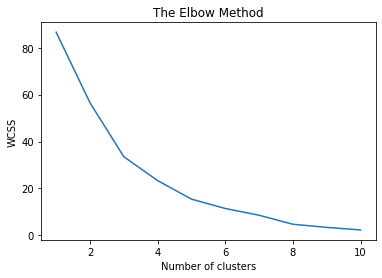

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
from sklearn.cluster import DBSCAN


In [19]:
dbscan = DBSCAN(eps=5, min_samples=5)


In [20]:
labels = dbscan.fit_predict(df)


In [21]:
np.unique(labels)


array([0], dtype=int64)

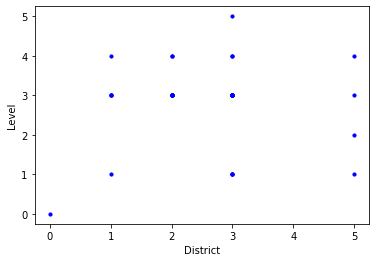

In [23]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('District')
plt.ylabel('Level')
plt.show()